In [74]:
import os
import pandas as pd


sample_path = "/blue/carpena/haasehelen/ifwaste/output/gsua_test/old/"
filename = "aggregated_outputs.csv"
df = pd.DataFrame()

foldernames = os.listdir(sample_path)
for folder in foldernames: 
    path = sample_path + folder + "/" + filename
    output = pd.read_csv(path)
    if len(df) == 0: 
        df = output
        df["run"] = int(folder.replace("run_", ""))
    else:
        output["run"] = int(folder.replace("run_", ""))
        df = pd.concat([df, output])
        
df["household"] = df["household"].astype(int)
df.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,n_shop,n_quickshop,run
0,66,318.858,217.317,304.700,131.748,180.532,246.846,514.011,271.078,876.798,766.137,785.206,614.795,514.011,100.0,0.0,10.0,0.0,0.0,3
1,7,298.035,224.731,250.983,128.601,207.775,178.485,406.794,268.424,990.360,436.621,827.041,461.570,406.794,98.0,2.0,45.0,0.0,0.0,3
2,1,390.698,223.897,332.390,177.208,231.813,247.221,532.418,299.844,1087.569,748.232,925.045,678.182,532.418,100.0,0.0,52.0,0.0,0.0,3
3,83,345.545,270.484,84.110,127.197,265.028,164.567,540.070,199.054,964.959,632.989,818.883,438.048,540.070,96.0,4.0,51.0,0.0,0.0,3
4,92,485.828,272.045,408.334,331.073,224.680,534.662,575.653,346.453,1411.626,1074.196,1290.149,966.473,575.653,86.0,14.0,72.0,0.0,0.0,3


In [75]:
print(df[df["household"] == 1].to_string())

    household   FGMEAT  FGDAIRY  FGVEGETABLE  FGDRYFOOD  FGSNACKS  FGBAKED  FGSTOREPREPARED  Inedible Parts  Plate Waste  Spoiled Food  Prepared  Unprepared  Preprepared  n_quickcook  n_cook  n_leftovers  n_shop  n_quickshop  run
2           1  390.698  223.897      332.390    177.208   231.813  247.221          532.418         299.844     1087.569       748.232   925.045     678.182      532.418        100.0     0.0         52.0     0.0          0.0    3
96          1  344.609  237.169      252.958    136.163   241.146  191.944          524.988         247.779      906.384       774.814   802.713     601.276      524.988        100.0     0.0         11.0     0.0          0.0    0
23          1  462.641  265.307      390.446    153.019   191.360  300.530          328.532         372.336     1101.048       618.451   970.228     793.076      328.532         99.0     1.0         28.0     0.0          0.0    5
83          1  250.792  185.657      326.261    155.480   239.376  232.613      

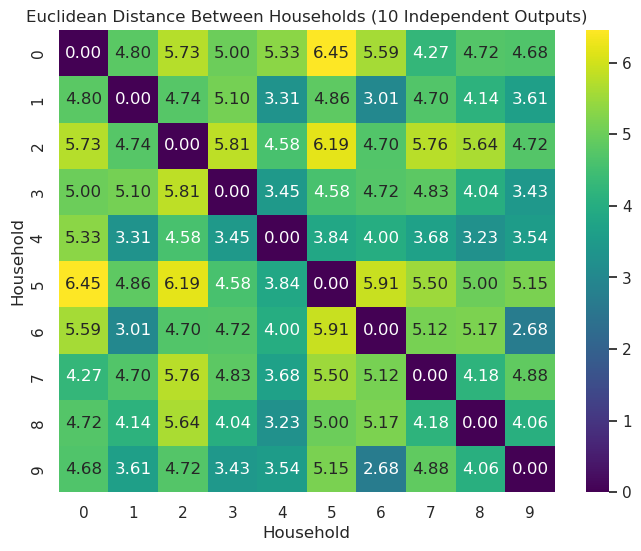

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Simulate: 10 households, 20 runs, 10 unrelated outputs (on different scales)
np.random.seed(42)
n_households = 10
n_runs = 20
n_outputs = 10

# Simulate random data with different scales per output
scales = np.linspace(1, 100, n_outputs)  # output 0 varies ~1 unit, output 9 ~100 units
household_data = [
    np.random.normal(loc=0, scale=scales, size=(n_runs, n_outputs))
    for _ in range(n_households)
]

# Step 1: compute mean vector per household
mean_vectors = np.array([data.mean(axis=0) for data in household_data])  # shape: (10, 10)

# Optional Step 2: normalize per output (column-wise)
# You can use z-score or min-max
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mean_vectors_scaled = scaler.fit_transform(mean_vectors)

# Step 3: compute pairwise Euclidean distance
dist_matrix = squareform(pdist(mean_vectors_scaled, metric='euclidean'))

# Step 4: visualize
plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=True, yticklabels=True)
plt.title("Euclidean Distance Between Households (10 Independent Outputs)")
plt.xlabel("Household")
plt.ylabel("Household")
plt.show()


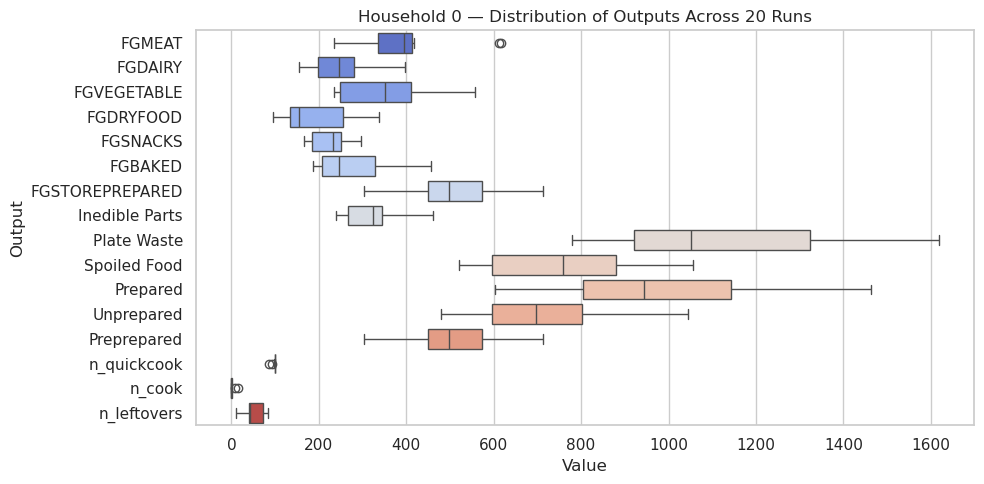

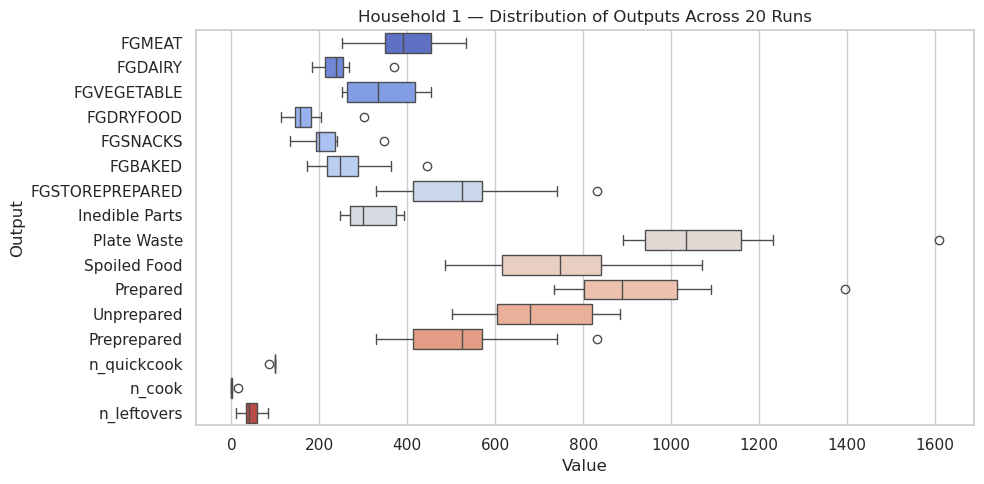

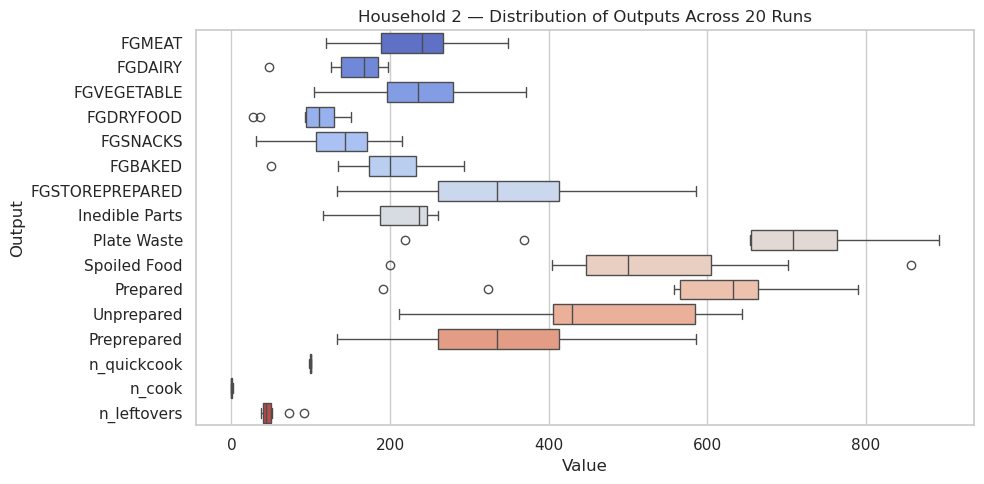

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn theme
sns.set(style="whitegrid")

# Identify the output columns (excluding household/run)
output_cols = [col for col in df.columns if col not in ['household', 'run',"n_shop", "n_quickshop"]]

# Create individual plots per household
for household_id in sorted(df['household'].unique()):
    household_data = df[df['household'] == household_id]

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=household_data[output_cols], orient='h', palette='coolwarm')
    
    plt.title(f"Household {household_id} — Distribution of Outputs Across 20 Runs")
    plt.xlabel("Value")
    plt.ylabel("Output")
    plt.tight_layout()
    plt.show()
    
    if household_id > 1: 
        break


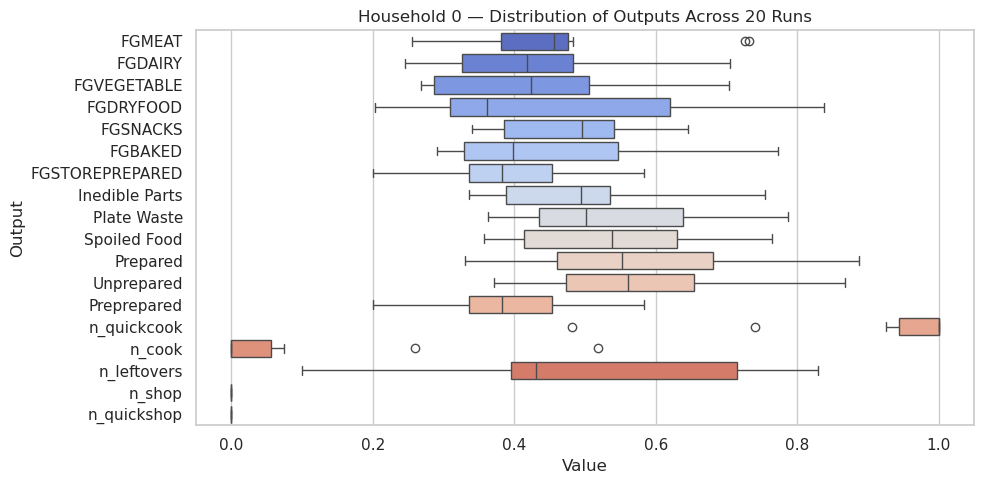

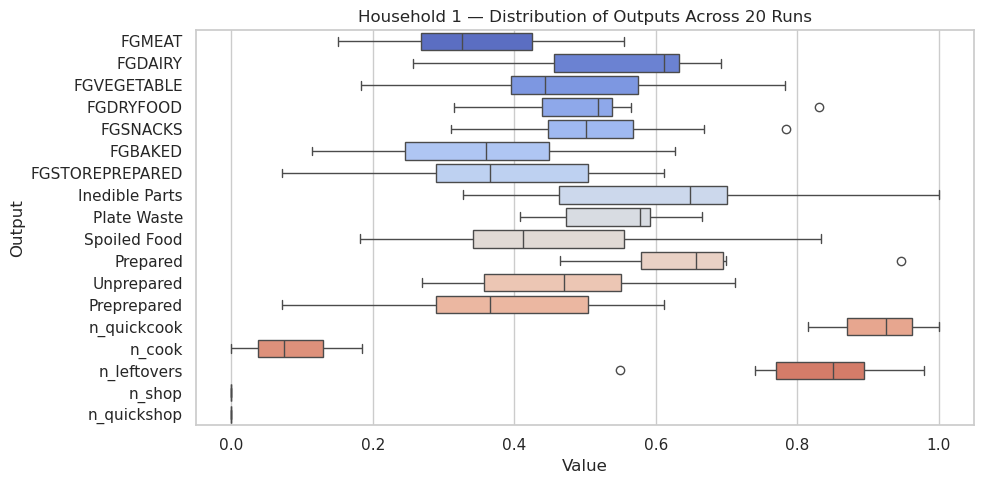

/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


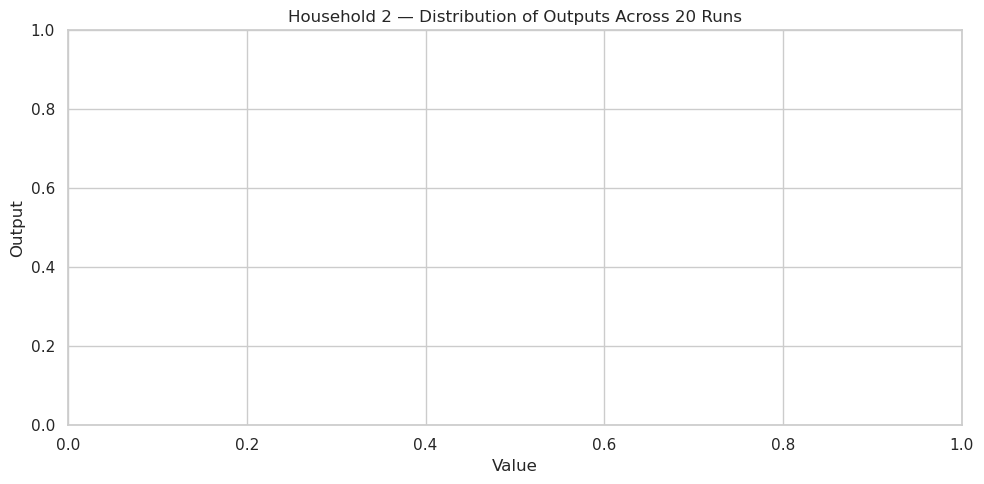

In [79]:

from sklearn import preprocessing


x = df.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled,columns=df.columns)

# Identify the output columns (excluding household/run)
output_cols = [col for col in df.columns if col not in ['household', 'run',]]

# Create individual plots per household
for household_id in range(0,df["household"].max()):
    if household_id > 2: 
        break
    household_data = df_normalized[df_normalized['household'] == household_id]

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=household_data[output_cols], orient='h', palette='coolwarm')
    
    plt.title(f"Household {household_id} — Distribution of Outputs Across 20 Runs")
    plt.xlabel("Value")
    plt.ylabel("Output")
    plt.tight_layout()
    plt.show()



In [ ]:
## coefficient of variation:

import pandas as pd

# Create empty DataFrame to store CVs
cv_data = []
cv_df = (
    df.groupby("household")[output_cols]
    .agg(lambda x: np.std(x) / np.abs(np.mean(x)) if np.mean(x) != 0 else np.nan)
    .reset_index()
)



   household   FGMEAT   FGDAIRY  FGVEGETABLE  FGDRYFOOD  FGSNACKS   FGBAKED  \
0          0  0.27734  0.273071     0.280359   0.395568  0.187663  0.305452   

   FGSTOREPREPARED  Inedible Parts  Plate Waste  Spoiled Food  Prepared  \
0         0.214634        0.209329     0.245805      0.236483  0.264158   

   Unprepared  Preprepared  n_quickcook    n_cook  n_leftovers  n_shop  \
0    0.241245     0.214634     0.043333  1.942757     0.408464     NaN   

   n_quickshop  
0          NaN  


In [81]:
# Count number of outputs with CV above threshold

cv_threshold = 0.5
n_over_threshold = 3
cv_df['num_unstable_outputs'] = (cv_df[output_cols] > cv_threshold).sum(axis=1)
cv_df = cv_df.drop(columns=["n_shop", "n_quickshop"])
# Reject household if 3 or more outputs are too variable
allowed_households = cv_df[cv_df['num_unstable_outputs'] < n_over_threshold ]['household']

In [82]:
#cv_df = cv_df.drop(columns=["n_shop", "n_quickshop", "num_unstable_outputs"])
cv_df.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,num_unstable_outputs
0,0,0.277340,0.273071,0.280359,0.395568,0.187663,0.305452,0.214634,0.209329,0.245805,0.236483,0.264158,0.241245,0.214634,0.043333,1.942757,0.408464,1
1,1,0.210380,0.203962,0.218184,0.277950,0.261496,0.287392,0.274095,0.172706,0.182371,0.236947,0.198451,0.179287,0.274095,0.043388,2.764080,0.482795,1
2,2,0.281745,0.265199,0.296690,0.376841,0.360961,0.318207,0.368365,0.202376,0.282327,0.309770,0.286289,0.264900,0.368365,0.007863,1.433721,0.325002,1
3,3,0.541965,0.499967,0.499810,0.613963,0.512760,0.570052,0.550042,0.415881,0.598947,0.455923,0.541280,0.446455,0.550042,0.003864,2.121320,0.466957,9
4,4,0.219981,0.270848,0.313247,0.337496,0.185944,0.331031,0.304807,0.198555,0.165188,0.326247,0.196295,0.272403,0.304807,0.037348,2.124908,0.652932,2


In [83]:
cv_matrix

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers
household,,,,,,,,,,,,,,,,
0,0.277340,0.273071,0.280359,0.395568,0.187663,0.305452,0.214634,0.209329,0.245805,0.236483,0.264158,0.241245,0.214634,0.043333,1.942757,0.408464
1,0.210380,0.203962,0.218184,0.277950,0.261496,0.287392,0.274095,0.172706,0.182371,0.236947,0.198451,0.179287,0.274095,0.043388,2.764080,0.482795
2,0.281745,0.265199,0.296690,0.376841,0.360961,0.318207,0.368365,0.202376,0.282327,0.309770,0.286289,0.264900,0.368365,0.007863,1.433721,0.325002
3,0.541965,0.499967,0.499810,0.613963,0.512760,0.570052,0.550042,0.415881,0.598947,0.455923,0.541280,0.446455,0.550042,0.003864,2.121320,0.466957
4,0.219981,0.270848,0.313247,0.337496,0.185944,0.331031,0.304807,0.198555,0.165188,0.326247,0.196295,0.272403,0.304807,0.037348,2.124908,0.652932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.238327,0.263949,0.311281,0.292636,0.296990,0.396937,0.206395,0.182793,0.318582,0.304884,0.238938,0.245288,0.206395,0.062002,1.038038,0.078951
96,0.276463,0.257942,0.439849,0.211082,0.176178,0.330825,0.365556,0.225661,0.102938,0.323049,0.163649,0.241816,0.365556,0.016040,1.341200,0.109149
97,0.360597,0.247934,0.382143,0.271218,0.279906,0.430319,0.290264,0.177086,0.159690,0.238642,0.133827,0.257150,0.290264,0.013200,0.793492,0.201674


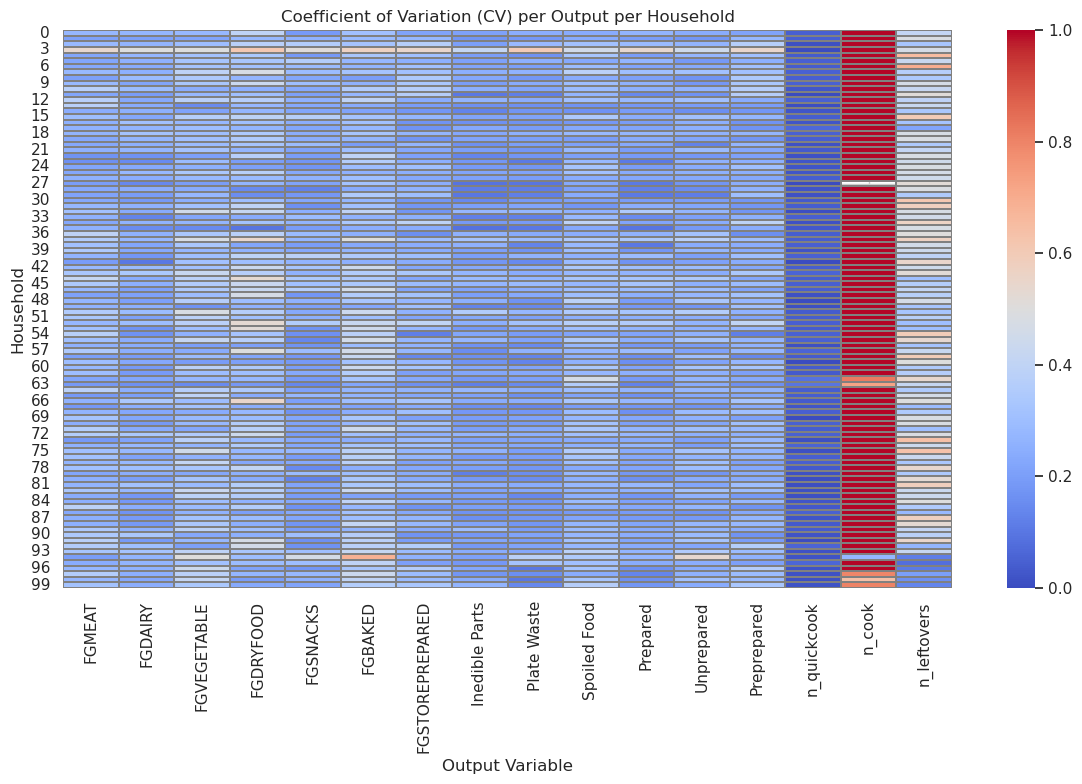

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Set index to household for plotting
cv_matrix = cv_df.set_index('household')
cv_matrix = cv_matrix.drop(columns=["num_unstable_outputs"])
# Plot the heatmap, scaling color limits
plt.figure(figsize=(12, 8))
sns.heatmap(cv_matrix, cmap='coolwarm', annot=False, linewidths=0.3, linecolor='grey', vmin=0, vmax=1)
plt.title("Coefficient of Variation (CV) per Output per Household")
plt.xlabel("Output Variable")
plt.ylabel("Household")
plt.tight_layout()
plt.show()


In [88]:
cv_df.columns

Index(['household', 'FGMEAT', 'FGDAIRY', 'FGVEGETABLE', 'FGDRYFOOD',
       'FGSNACKS', 'FGBAKED', 'FGSTOREPREPARED', 'Inedible Parts',
       'Plate Waste', 'Spoiled Food', 'Prepared', 'Unprepared', 'Preprepared',
       'n_quickcook', 'n_cook', 'n_leftovers', 'num_unstable_outputs'],
      dtype='object')

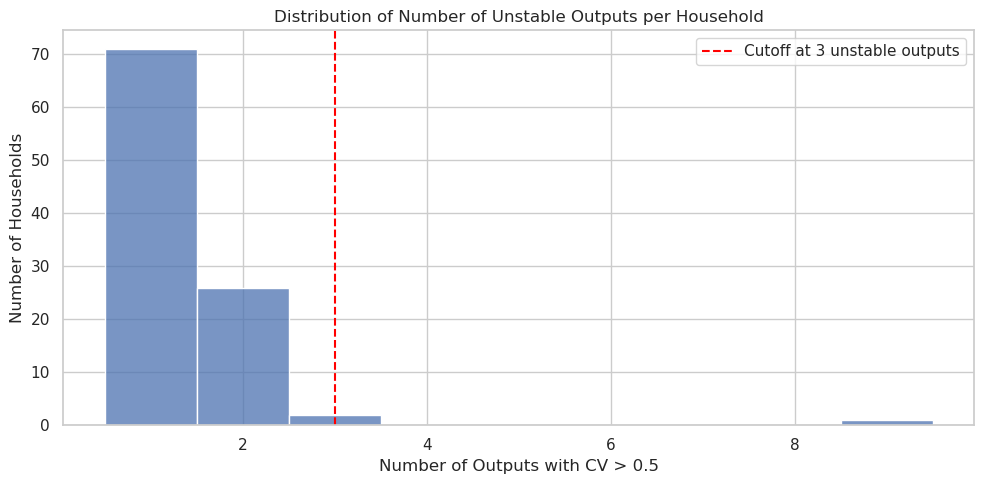

In [89]:
max_unstable = cv_df['num_unstable_outputs'].max()

plt.figure(figsize=(10, 5))
sns.histplot(
    cv_df['num_unstable_outputs'],
    bins=range(0, max_unstable + 2),  # +2 to include last bin
    discrete=True
)
plt.axvline(3, color='red', linestyle='--', label="Cutoff at 3 unstable outputs")
plt.title("Distribution of Number of Unstable Outputs per Household")
plt.xlabel("Number of Outputs with CV > 0.5")
plt.ylabel("Number of Households")
plt.legend()
plt.tight_layout()
plt.show()
